<a href="https://colab.research.google.com/github/gautampatil01/car-price-prediction/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Name : Gautam Patil
## Project name: Car Price Prediction

## Problem Statement:

#### The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning.

## Overview of Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
car = pd.read_csv('/content/drive/MyDrive/Datasets/car data.csv')
df = car.copy()

In [4]:
df.head(100)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
95,corolla altis,2012,5.85,18.61,72000,Petrol,Dealer,Manual,0
96,innova,2016,20.75,25.39,29000,Diesel,Dealer,Automatic,0
97,corolla altis,2017,17.00,18.64,8700,Petrol,Dealer,Manual,0
98,corolla altis,2013,7.05,18.61,45000,Petrol,Dealer,Manual,0


In [5]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
duplicates = df[df.duplicated()]

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
df.shape

(299, 9)

- We have 301 rows and 9 columns in dataset.
- Selling price is our dependent variable.
- There were 2 duplicated values and no null values in dataset.
- This dataset contains data of cars from year 2003 to 2018.

## EDA

<Axes: xlabel='Selling_Price', ylabel='Count'>

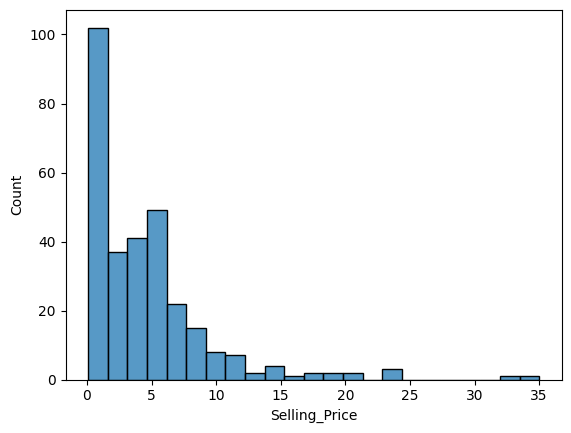

In [11]:
sns.histplot(x = df['Selling_Price'])

<Axes: xlabel='Selling_Price', ylabel='Count'>

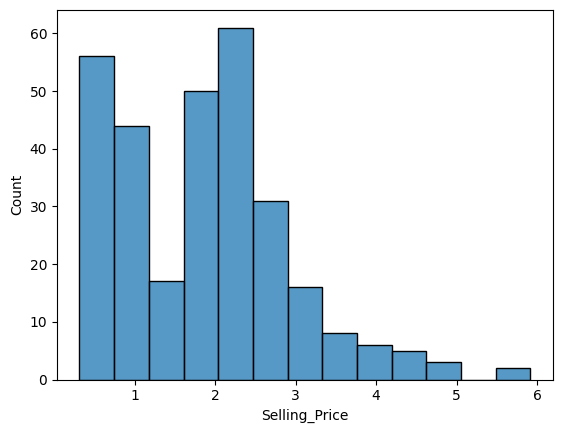

In [12]:
sns.histplot(x = np.sqrt(df['Selling_Price']))

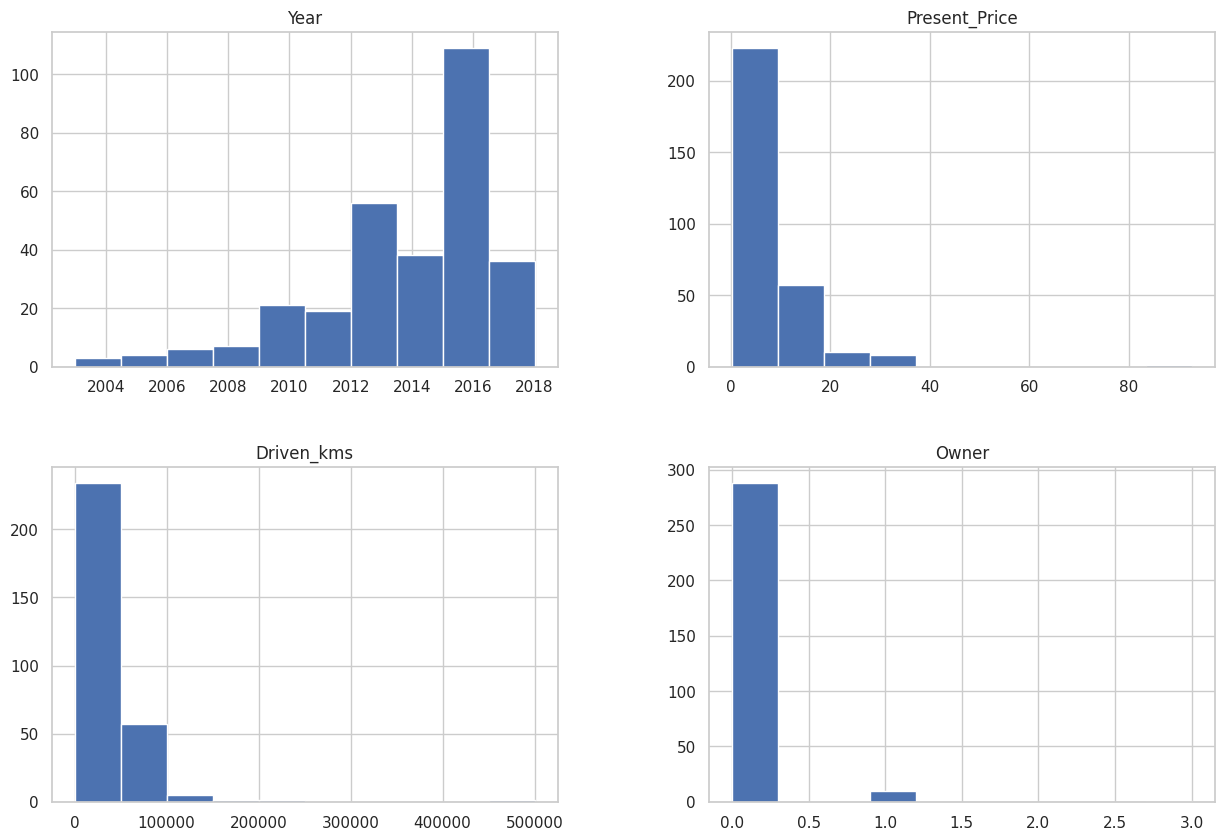

In [26]:
# Univariate Analysis
df.drop(['Selling_Price'], axis = 1).hist(figsize=(15,10))
plt.show()

There are certain outliers in the driven kilometers and current price that need to be addressed.

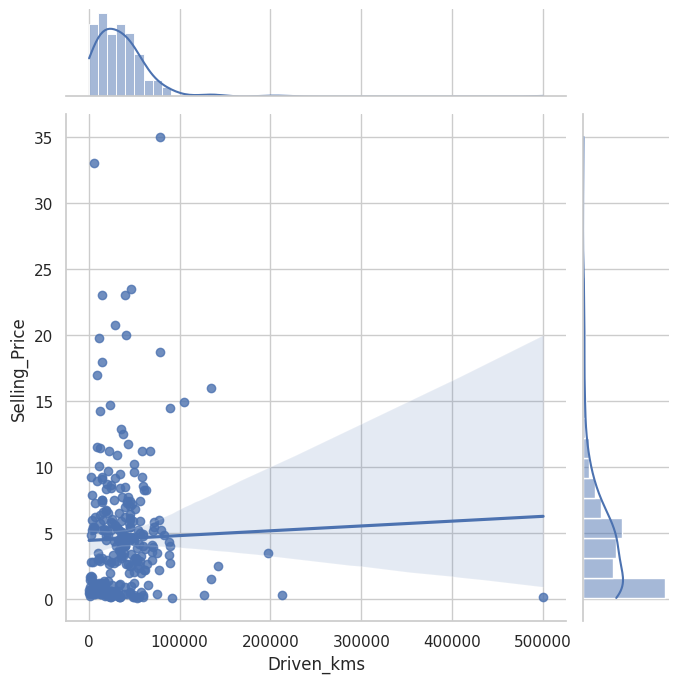

In [14]:
sns.set(style="whitegrid")
sns.jointplot(x='Driven_kms', y='Selling_Price', data=df, kind='reg', height=7)
plt.show()

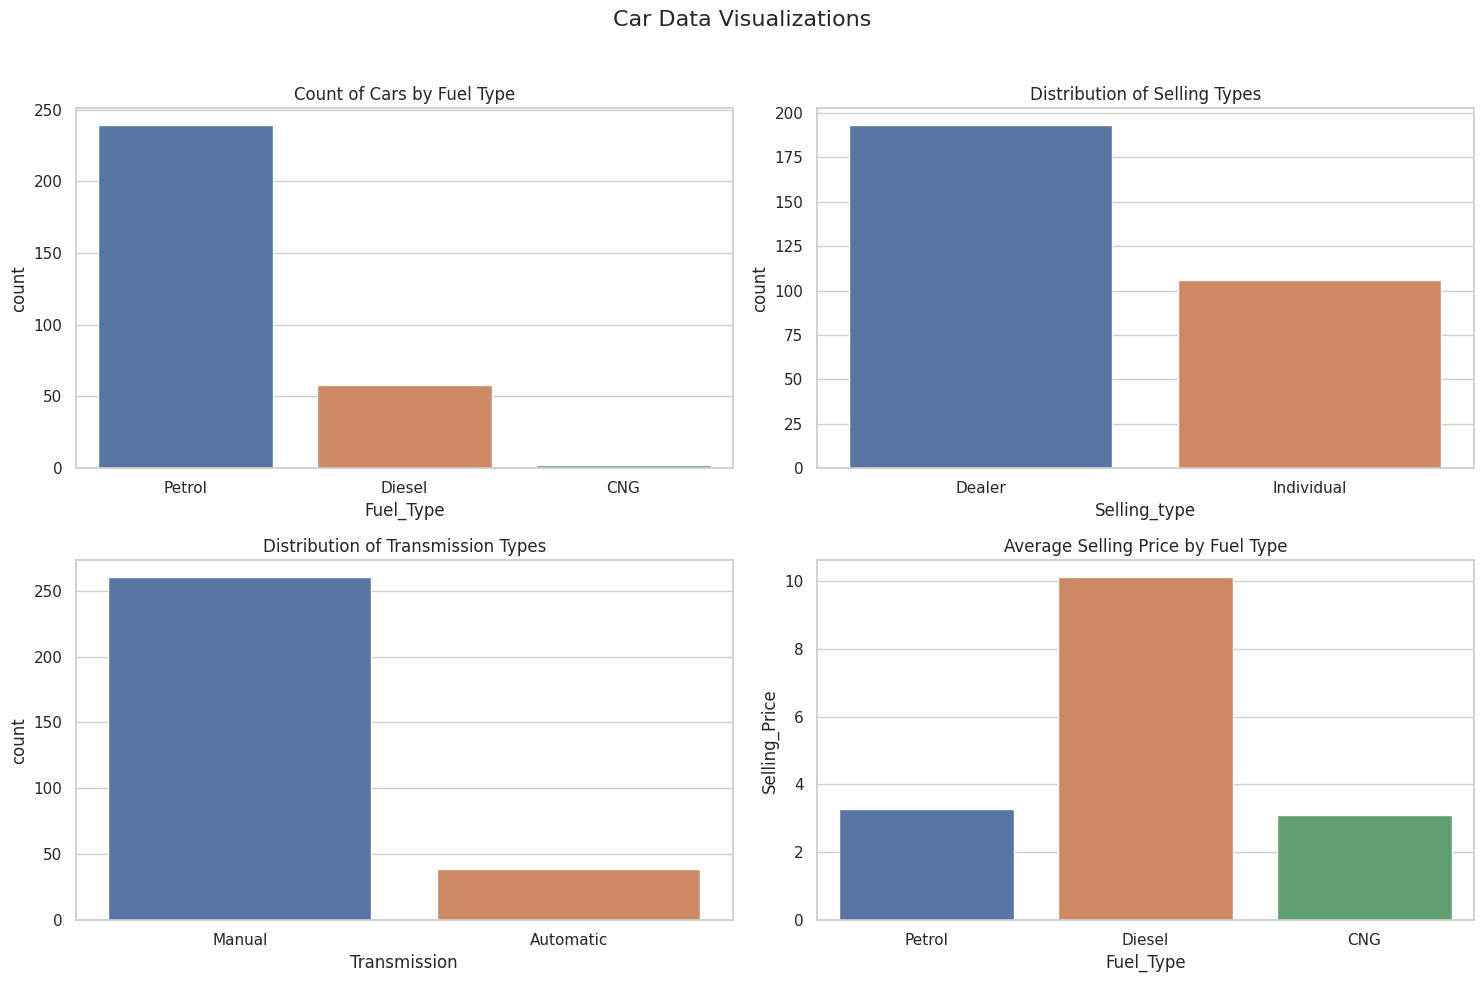

In [15]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Car Data Visualizations', fontsize=16)

sns.countplot(x='Fuel_Type', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Count of Cars by Fuel Type')

sns.countplot(x='Selling_type', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Selling Types')

sns.countplot(x='Transmission', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Transmission Types')

sns.barplot(x='Fuel_Type', y='Selling_Price', data=df, ci=None, ax=axes[1, 1])
axes[1, 1].set_title('Average Selling Price by Fuel Type')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

- The first graphic shows that most cars operate on petrol.
- Cars sold by dealers are significantly more common in the sample than cars sold by individual sellers, suggesting that dealer-initiated sales procedures occur more frequently.
- Within the dataset, a significant majority of the cars exhibit a manual transmission type, suggesting that manual transmissions are more common among the included vehicles.
---



## Feature Engineering

In [16]:
temp_df = df[['Year', 'Present_Price', 'Driven_kms', 'Owner']]
temp_df1 = df[['Fuel_Type', 'Selling_type', 'Transmission']]

In [17]:
label_encoder = LabelEncoder()
temp_df1['Fuel_Type'] = label_encoder.fit_transform(temp_df1['Fuel_Type'])
temp_df1['Selling_type'] = label_encoder.fit_transform(temp_df1['Selling_type'])
temp_df1['Transmission'] = label_encoder.fit_transform(temp_df1['Transmission'])
temp_df1

,Fuel_Type,Selling_type,Transmission
0,2,0,1
1,1,0,1
2,2,0,1
3,2,0,1
4,1,0,1
...,...,...,...
296,1,0,1
297,2,0,1
298,2,0,1
299,1,0,1


In [18]:
car_df = pd.concat([temp_df,temp_df1], axis = 1)
car_df

,Year,Present_Price,Driven_kms,Owner,Fuel_Type,Selling_type,Transmission
0,2014,5.59,27000,0,2,0,1
1,2013,9.54,43000,0,1,0,1
2,2017,9.85,6900,0,2,0,1
3,2011,4.15,5200,0,2,0,1
4,2014,6.87,42450,0,1,0,1
...,...,...,...,...,...,...,...
296,2016,11.60,33988,0,1,0,1
297,2015,5.90,60000,0,2,0,1
298,2009,11.00,87934,0,2,0,1
299,2017,12.50,9000,0,1,0,1


In [19]:
x = car_df
y = np.sqrt(df['Selling_Price'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Machine Learning

### Linear Regression

In [20]:
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

# Predict the target variable for the test data
y_test_pred = model.predict(x_test)

# Evaluation Metrics
print("=============== Model Evaluation ===============")

# Calculate Mean Squared Error (MSE)
MSE = mean_squared_error(np.square(y_test), np.square(y_test_pred))
print("Mean Squared Error (MSE):        {:.4f}".format(MSE))

# Calculate Root Mean Squared Error (RMSE)
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error (RMSE):  {:.4f}".format(RMSE))

# Calculate R^2 Score
r2 = r2_score(y_test, y_test_pred)
print("R^2 Score:                       {:.4f}".format(r2))

# Calculate Adjusted R^2 Score
adjusted_r2 = 1 - ((1 - r2) * (x.shape[0] - 1) / (x.shape[0] - x.shape[1] - 1))
print("Adjusted R^2 Score:              {:.4f}".format(adjusted_r2))
print("================================================")

=============== Model Evaluation ===============
Mean Squared Error (MSE):        3.7748
Root Mean Squared Error (RMSE):  1.9429
R^2 Score:                       0.9091
Adjusted R^2 Score:              0.9069


### Ridge Regression

In [21]:
ridge_reg = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_cv = GridSearchCV(ridge_reg, parameters, scoring = 'r2' , cv = 5)

In [22]:
# Fit the model to the training data
ridge_cv.fit(x_train, y_train)

# Predict the target variable for the test data
y_test_pred = ridge_cv.predict(x_test)

# Evaluation Metrics
print("=============== Model Evaluation ===============")

# Calculate Mean Squared Error (MSE)
MSE = mean_squared_error(np.square(y_test), np.square(y_test_pred))
print("Mean Squared Error (MSE):        {:.4f}".format(MSE))

# Calculate Root Mean Squared Error (RMSE)
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error (RMSE):  {:.4f}".format(RMSE))

# Calculate R^2 Score
r2 = r2_score(y_test, y_test_pred)
print("R^2 Score:                       {:.4f}".format(r2))

# Calculate Adjusted R^2 Score
adjusted_r2 = 1 - ((1 - r2) * (x.shape[0] - 1) / (x.shape[0] - x.shape[1] - 1))
print("Adjusted R^2 Score:              {:.4f}".format(adjusted_r2))
print("================================================")

=============== Model Evaluation ===============
Mean Squared Error (MSE):        3.7748
Root Mean Squared Error (RMSE):  1.9429
R^2 Score:                       0.9091
Adjusted R^2 Score:              0.9069


### Decision Tree

In [23]:
dt = DecisionTreeRegressor()

# Fit the model to the training data
dt.fit(x_train, y_train)

# Predict the target variable for the test data
y_test_pred = dt.predict(x_test)

# Evaluation Metrics
print("=============== Model Evaluation ===============")

# Calculate Mean Squared Error (MSE)
MSE = mean_squared_error(np.square(y_test), np.square(y_test_pred))
print("Mean Squared Error (MSE):        {:.4f}".format(MSE))

# Calculate Root Mean Squared Error (RMSE)
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error (RMSE):  {:.4f}".format(RMSE))

# Calculate R^2 Score
r2 = r2_score(y_test, y_test_pred)
print("R^2 Score:                       {:.4f}".format(r2))

# Calculate Adjusted R^2 Score
adjusted_r2 = 1 - ((1 - r2) * (x.shape[0] - 1) / (x.shape[0] - x.shape[1] - 1))
print("Adjusted R^2 Score:              {:.4f}".format(adjusted_r2))
print("================================================")

=============== Model Evaluation ===============
Mean Squared Error (MSE):        4.1901
Root Mean Squared Error (RMSE):  2.0470
R^2 Score:                       0.8831
Adjusted R^2 Score:              0.8802


## Conclusion

- In conclusion, the car prediction dataset, encompassing features like car name, manufacturing year, selling price, present price, driven kilometers, fuel type, selling type, transmission, and owner details, has been analyzed using various regression models.
- Notably, both Linear Regression and Ridge Regression exhibited a commendable R^2 score of 0.91, elucidating their effectiveness in explaining approximately 91% of the variance in selling prices.
- However, the Decision Tree model performed with an  R^2 score of 0.88, showcasing its ability to capture 88% of variance.
- The Adjusted R^2 score of 0.91 for the Linear Regression and Ridge Regression model underscores its suitability by balancing model complexity and explanatory power.
- The choice of the best model should consider factors beyond R^2 scores, such as interpretability and business context.
- Communication of results to stakeholders and exploration of future enhancements, such as hyperparameter tuning and advanced modeling techniques, are pivotal for the success and continual improvement of the car price prediction project.